In [40]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from skimage import exposure
import warnings
warnings.filterwarnings('ignore')

In [41]:
def getPCA(X,k):
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k

def getSift(img):
    sift = cv2.xfeatures2d.SIFT_create()
    return sift.detectAndCompute(img,None)
def getImgRep(img):
    
    img = cv2.imread(img)
    kp,desc=getSift(img)
    ret=np.mean(np.array(desc).T,axis=1)
    print(ret.shape)

    return ret


In [42]:
Map=[]
def Label_Data():
    ImgData,label=[],[]
    for filename in os.listdir("./data/rgb_with_puddle"):
        try:
            ret=getImgRep(("./data/rgb_with_puddle/"+filename))
            ImgData.append(ret.ravel())
            label.append(1)
            Map.append("./data/rgb_with_puddle/"+filename)
        except:
            pass
        
    for filename in os.listdir("./data/rgb_without_puddle"):
        try:
            ret=getImgRep(("./data/rgb_without_puddle/"+filename))
            ImgData.append(ret.ravel())
            label.append(0)
            Map.append("./data/rgb_without_puddle/"+filename)
        except:
            pass
    for filename in os.listdir("./data/rotated_with_puddle"):
        try:
            ret=getImgRep(("./data/rotated_with_puddle/"+filename))
            ImgData.append(ret.ravel())
            label.append(1)
            Map.append("./data/rotated_with_puddle/"+filename)
        except:
            pass
        
    for filename in os.listdir("./data/rotated_without_puddle"):
        try:
            ret=getImgRep(("./data/rotated_without_puddle/"+filename))
            ImgData.append(ret.ravel())
            Map.append("./data/rotated_without_puddle/"+filename)
            label.append(0)
        except:
            pass

    return np.array(ImgData),np.array(label),np.array(Map)

def Split_Data(data,label):
    X_train,X_test,Y_train,Y_test = train_test_split(np.array(data),np.array(label),test_size=0.1,random_state=70)

    return X_train,X_test,Y_train,Y_test

In [43]:
data,label,Map=Label_Data()


(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)

In [44]:
print(data.shape)

(1021, 128)


In [45]:
X_train,X_test,Y_train,Y_test=Split_Data(data,label)

In [46]:
models = [
    MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True),
    
    LogisticRegression(solver='lbfgs'),
    
    SGDClassifier(max_iter=200, tol=1e-2),

    SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
    
    RandomForestClassifier(),
]

m_names = [m.__class__.__name__ for m in models]
models = list(zip(m_names, models))
vc = VotingClassifier(estimators=models)

def Build_Classifiers():
    vote=[]
    vc.fit(X_train, Y_train)
    f=vc.predict(X_test)
    print("Test Accuracy is : " , np.where(f==Y_test)[0].shape[0]/Y_test.shape[0])
    analysis=Y_test[np.where(f!=Y_test)[0]]
#     print(analysis)
    return Map[np.where(f!=Y_test)[0]]
#     for clf in models:
#         clf.fit(X_train,Y_train)
#         f1=clf.predict(X_train)
#         print("Train Accuracy is : " , np.where(f1==Y_train)[0].shape[0]/Y_train.shape[0])
#         train_acc=np.where(f1==Y_train)[0].shape[0]/Y_train.shape[0]    
#         f2=clf.predict(X_test)


In [47]:
Wrong_Images=Build_Classifiers()


Test Accuracy is :  0.8058252427184466


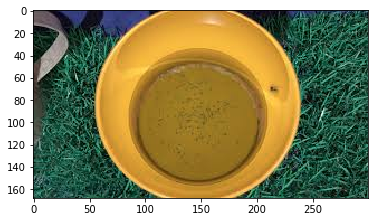

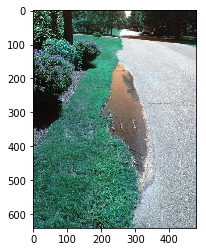

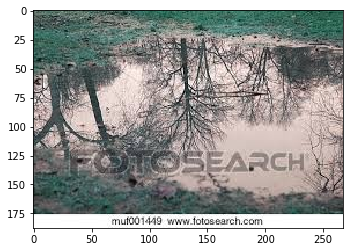

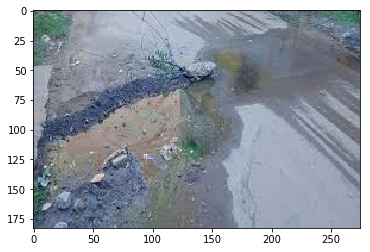

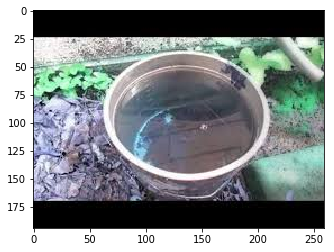

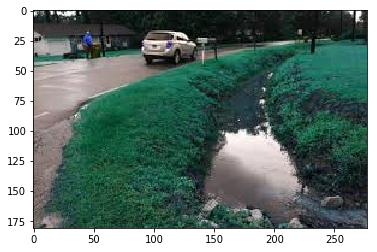

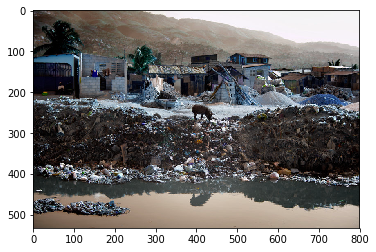

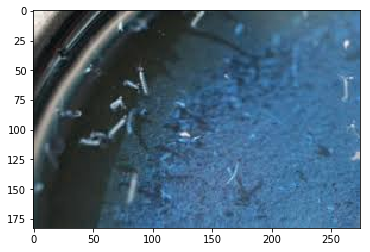

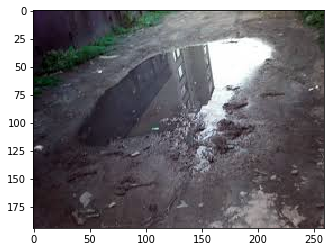

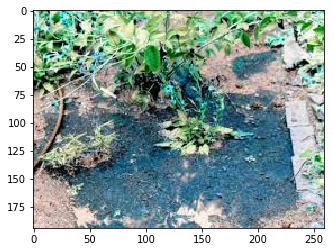

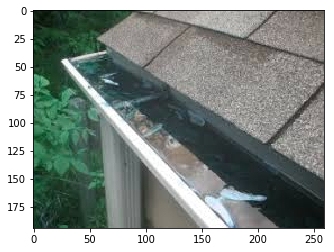

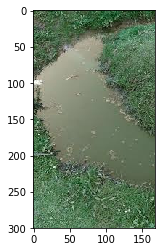

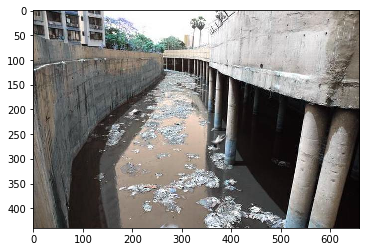

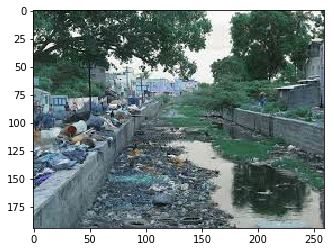

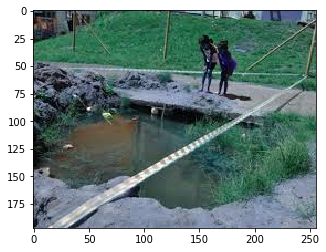

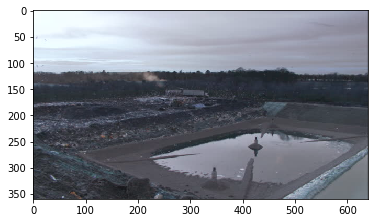

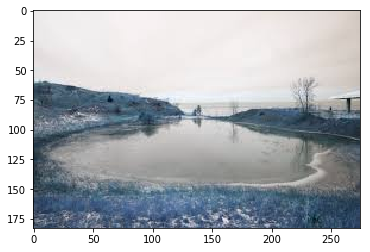

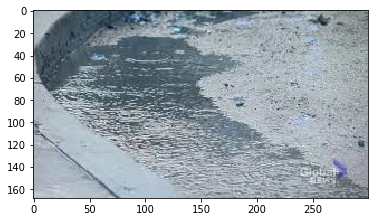

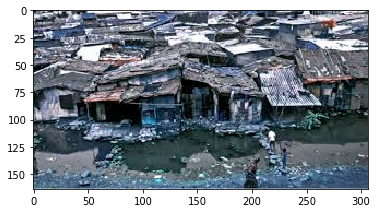

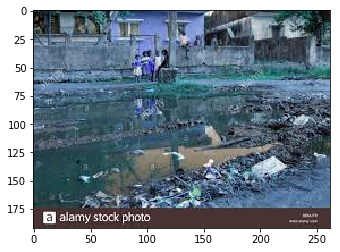

In [48]:
for i in range(len(Wrong_Images)):
    plt.imshow(cv2.imread(Wrong_Images[i]))
    plt.show()